In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
from ast import mod

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Carregando dados
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Função para limpar base de dados
def clean_data(data):
  # Passo 1
  # Eliminar colunas com menos de 10% de valores preenchidos
  col_drop = data.columns[(data.isnull().sum()/data.shape[0]) > 0.1]
  data.drop(col_drop, inplace=True, axis=1)

  # Passo 2
  # Buscar colunas texto e preencher valores nulls com -1
  base_string = data.loc[:, data.columns[data.dtypes == 'object']]
  base_string.fillna('NA', inplace=True)

  # Passo 3
  # Elimina colunas que não são numéricas
  col_select = data.columns[data.dtypes != 'object'] # colunas com valor numérico que podemos usar no modelo diretamente
  data = data.loc[:, col_select]
  # Preencher valores nulos das colunas numéricas
  data.fillna(-1, inplace=True)

  # Passo 4
  # Verificar colunas texto que não podem ser agrupadas para virar numéricas
  drop_col_string = []
  for col in base_string.columns:
    if (base_string[col].value_counts().count() >= 50):
      drop_col_string.append(col)

  base_string.drop(drop_col_string, inplace=True, axis=1)

  # Passo 5
  # Transformar colunas texto string em agrupamentos numéricos
  base_string =  base_string.apply(preprocessing.LabelEncoder().fit_transform)

  # Passo 6
  # Unir a base de colunas com texto com a base com colunas numéricas
  data = pd.concat([data, base_string], axis=1)

  return data

# Chamar função para limpeza das bases de treino e teste
train = clean_data(train)
test = clean_data(test)

# verificar se tem dado nan
# display(train[train['SaleCondition'].isna()])

#verificar agrupamento de informações
# train['SaleCondition'].value_counts()
# train.describe()

In [129]:
# Divisão dos dados em treino e validação para aplicação no modelo de ML
y = train['SalePrice']
X = train.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modelos a serem utilizados

Regressão Linearhttps://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Arvore de Regressão
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

KNeighborsRegression
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

RandomForestRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [130]:
# Regressão linear
model_linear_reg = LinearRegression().fit(X_train, y_train)
predict_linear_reg = model_linear_reg.predict(X_test)

# Arvore de regressão
model_tree_reg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
predict_tree_reg = model_tree_reg.predict(X_test)

# KNNeighbors Regressão
model_knn_reg = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
predict_knn_reg = model_knn_reg.predict(X_test)

# Random Forest Regressão
model_random_forest_reg = RandomForestRegressor().fit(X_train, y_train)
predict_random_forest_reg = model_random_forest_reg.predict(X_test)


In [131]:
# Comparando os resultados dos modelos com a média absoluta
# Avaliando o erro da regressão linear
print('Média Absoluta - regressão linear:', mean_absolute_error(y_test, predict_linear_reg))
# Avaliando o erro da árvore de regressão
print('Média Absoluta - árvore de regressão:', mean_absolute_error(y_test, predict_tree_reg))
# Avaliando o erro da KNNeighbros regressão
print('Média Absoluta - KNNeighbros regressão:', mean_absolute_error(y_test, predict_knn_reg))
# Avaliando o erro da Random Forest regressão
print('Média Absoluta - Random Forest regressão:', mean_absolute_error(y_test, predict_random_forest_reg))

# Comparando os resultados dos modelos com a média quadrática
# Avaliando o erro da regressão linear
print('Média Quadrática - regressão linear:', mean_squared_error(y_test, predict_linear_reg))
# Avaliando o erro da árvore de regressão
print('Média Quadrática - árvore de regressão:', mean_squared_error(y_test, predict_tree_reg))
# Avaliando o erro da KNNeighbros regressão
print('Média Quadrática - KNNeighbros regressão:', mean_squared_error(y_test, predict_knn_reg))
# Avaliando o erro da Random Forest regressão
print('Média Quadrática - Random Forest regressão:', mean_squared_error(y_test, predict_random_forest_reg))


Média Absoluta - regressão linear: 21151.011229668373
Média Absoluta - árvore de regressão: 26772.404109589042
Média Absoluta - KNNeighbros regressão: 32566.26712328767
Média Absoluta - Random Forest regressão: 17593.490719178084
Média Quadrática - regressão linear: 1134640506.8970232
Média Quadrática - árvore de regressão: 1664121722.5342467
Média Quadrática - KNNeighbros regressão: 2698731584.775685
Média Quadrática - Random Forest regressão: 844492390.2111543


Text(0.5, 1.0, 'Floresta Randomica Regressão')

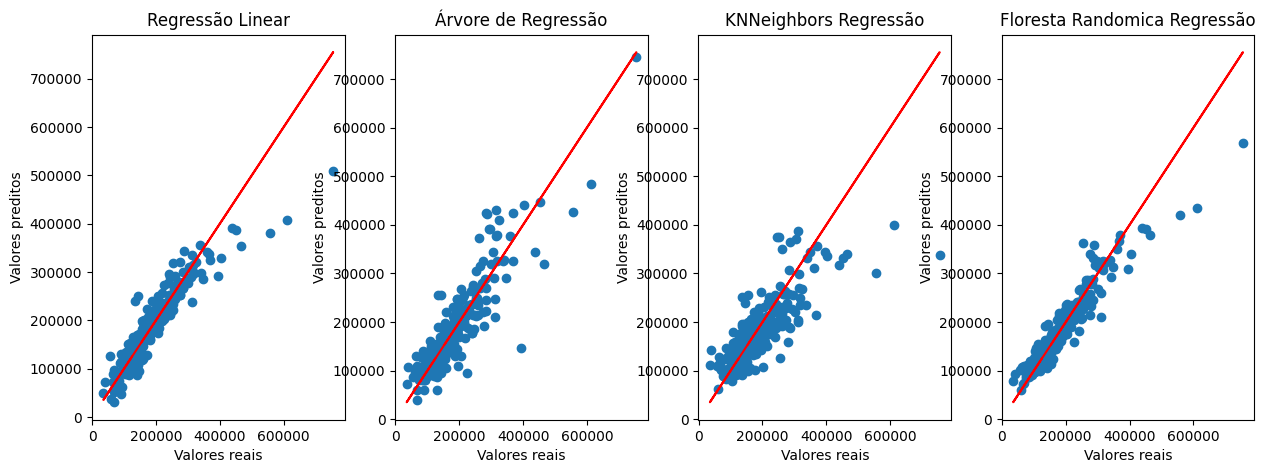

In [132]:
fig, ax = plt.subplots(ncols=4, figsize=(15, 5))
ax[0].scatter(y_test, predict_linear_reg)
ax[0].plot(y_test, y_test, color='red')
ax[0].set_xlabel('Valores reais')
ax[0].set_ylabel('Valores preditos')
ax[0].set_title('Regressão Linear')

ax[1].scatter(y_test, predict_tree_reg)
ax[1].plot(y_test, y_test, color='red')
ax[1].set_xlabel('Valores reais')
ax[1].set_ylabel('Valores preditos')
ax[1].set_title('Árvore de Regressão')

ax[2].scatter(y_test, predict_knn_reg)
ax[2].plot(y_test, y_test, color='red')
ax[2].set_xlabel('Valores reais')
ax[2].set_ylabel('Valores preditos')
ax[2].set_title('KNNeighbors Regressão')

ax[3].scatter(y_test, predict_random_forest_reg)
ax[3].plot(y_test, y_test, color='red')
ax[3].set_xlabel('Valores reais')
ax[3].set_ylabel('Valores preditos')
ax[3].set_title('Floresta Randomica Regressão')


In [133]:
# Executar a predição para o melhor modelo chamado
predict_final = model_random_forest_reg.predict(test)
test['SalePrice'] = predict_final
test[['Id', 'SalePrice']].to_csv('House_Prices_V002.csv', index=False)

PASSO 1 - BUSCAR COLUNAS PARA SEREM RETIRADAS DA BASE COM MUITOS VALORES NAM

In [134]:
# quantidade de colunas com valores vazios
# train.isnull().sum().sort_values(ascending=False).head(20)

# colunas com menos de 10% de valores preenchidos
# (train.isnull().sum()/train.shape[0]) > 0.1

# colunas a eliminar da base
# col_drop = train.columns[(train.isnull().sum()/train.shape[0]) > 0.1]
# col_drop

PASSO 2 - BUSCAR COLUNAS NUMÉRICAS PARA SELECIONAR A BASE PARA RODAR O MODELO

In [135]:
# train.dtypes # verifica o tipo de dado das colunas
# train.columns[train.dtypes != 'object'] # busca apenas os numéricos
# colunas = train.columns[train.dtypes != 'object'] # colunas com valor numérico que podemos usar no modelo diretamente
# base = train.loc[:, colunas]
# base.columns

PASSEO 3 - BUSCAR E PREENCHER VALORES NULOS DA BASE

In [136]:
#  train.isnull().sum().sort_values(ascending=False).head(20)

In [137]:
# Transformando valores texto em numéricos
# v_train = pd.read_csv('train.csv')
# v_train.columns[v_train.dtypes == 'object']


# base_string = v_train.loc[:, v_train.columns[v_train.dtypes == 'object']]
# base_string.fillna('NA', inplace=True)

# drop_columns_string = []
# for col in base_string.columns:
#   if v_train[col].value_counts().count() > 50:
#     print(col)
#     drop_columns_string.append(col)

# base_string.drop(drop_columns_string, inplace=True, axis=1)
# base_string =  base_string.apply(preprocessing.LabelEncoder().fit_transform)

# base_string.columns

# v_train[v_train.isnull().columns[v_train.dtypes == 'object']].isnull().sum().sort_values(ascending=False)
# col_drop = train.columns[(train.isnull().sum()/train.shape[0]) > 0.1]
#train.isnull().sum().sort_values(ascending=False).head(20)

# v_train['Alley'].value_counts()